In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pickle
import shap

import matplotlib.pyplot as plt

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
all_weather_conditions,all_timezones,ordering = pickle.load(open('One-Hot-Encoded_features_and_Ordering.pkl', 'rb'))
bst = pickle.load(open('xgboost_model.pkl','rb'))

In [3]:
# Example new datapoint (replace with your actual data)
all_weather_conditions,all_timezones,ordering = pickle.load(open('One-Hot-Encoded_features_and_Ordering.pkl', 'rb'))
bst = pickle.load(open('xgboost_model.pkl','rb'))
raw_data = {
    "Start_Lat": 47.123,
    "Start_Lng": -122.456,
    "End_Lat": 47.789,
    "End_Lng": -122.987,
    "Start_Time": "2024-04-11T10:00:00",
    "End_Time": "2024-04-11T11:30:00",
    "Weather_Condition": "Clear",
    "Timezone": "US/Pacific",
    "Turning_Loop": False,
    "No_Exit": True,
    "Crossing": False,
    "Junction": True,
    "Stop": False,
    "Traffic_Signal": True
}

datapoint = pd.DataFrame([raw_data])

# Convert start and end times to pandas datetime objects
datapoint["Start_Time"] = pd.to_datetime(datapoint["Start_Time"], errors="coerce").astype("int64")
datapoint["End_Time"] = pd.to_datetime(datapoint["End_Time"], errors="coerce").astype("int64")

# Calculate duration
datapoint["Duration"] = (datapoint["End_Time"] - datapoint["Start_Time"]).div(10**9)

# Create one-hot-encoded columns for weather conditions
for condition in all_weather_conditions:
    datapoint["Weather_Condition_"+condition] = (datapoint["Weather_Condition"] == condition).astype(int)

# Create one-hot-encoded columns for timezones
for timezone in all_timezones:
    datapoint["Timezone_"+timezone] = (datapoint["Timezone"] == timezone).astype(int)

# Drop original columns
datapoint.drop(columns=["Weather_Condition", "Timezone"], inplace=True)
datapoint = datapoint[ordering]

In [4]:
predicted_result = bst.predict_proba(datapoint)
print(predicted_result)

[[8.7157160e-04 9.8914528e-01 1.4857064e-03 8.4973145e-03]]


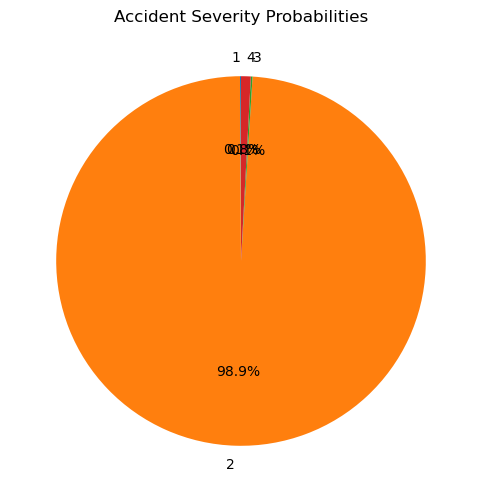

In [5]:
# Severity labels
class_labels = [i+1 for i in range(len(predicted_result[0]))]

# Create a pie chart
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.pie(predicted_result[0], labels=class_labels, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Accident Severity Probabilities')

# Show the pie chart
plt.show()